# Chapter 7 - Simple and Multiple Linear Regression

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from math import sqrt
from scipy import stats

### Read SPSS

In [4]:
import pyreadstat

# Read the SPSS file
df, meta = pyreadstat.read_sav("iq_data_p.323.sav")
df.head()

,verbal,quant,analytic,group
0,56.0,56.0,59.0,0.0
1,59.0,42.0,54.0,0.0
2,62.0,43.0,52.0,0.0
3,74.0,35.0,46.0,0.0
4,63.0,39.0,49.0,0.0


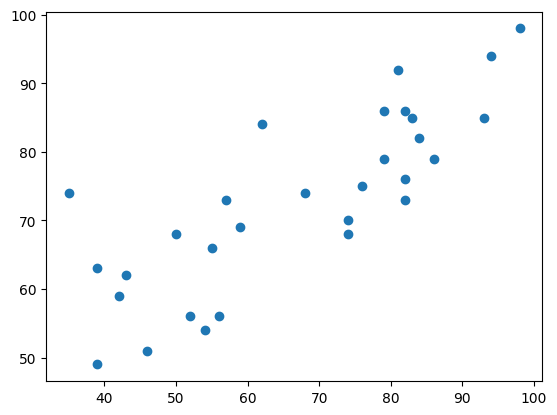

In [5]:
y = df["verbal"]
x = df["quant"]

plt.scatter(x, y);

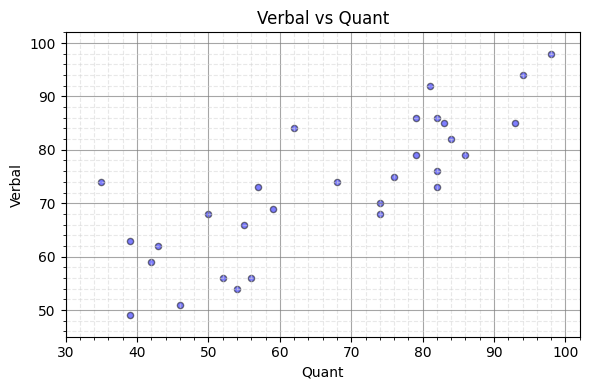

In [6]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(6, 4))  # Create a figure and axis for plotting

# Plot a scatterplot with scaled Population values
ax.scatter(x=df["quant"],               # X-axis: quant
           y= df["verbal"],             # Y-axis: verbal
           s=20,                        # Marker size for better visibility
           color='blue',                # Marker color
           edgecolor='black',           # Black edge for markers
           alpha=0.5)                   # Transparency for markers

plt.title('Verbal vs Quant')            # Title of the plot
plt.xlabel('Quant')                     # Label for the x-axis
plt.ylabel('Verbal')                    # Label for the y-axis

ax.grid(visible=True, linestyle='-', color='gray', alpha=0.7)  # Add grid

# Setting the limits for x and y axes
plt.xlim(30, 102)                       # Setting x-axis range from 30 to 105
plt.ylim(45, 102)                       # Setting y-axis range from 45 to 105

# Add minor grid lines (light gray and dashed)
ax.minorticks_on()                      # Enable minor ticks
ax.grid(visible=True, which='minor', linestyle='--', color='lightgray', alpha=0.5)

# Adjust layout to avoid overlap
plt.tight_layout()

# Display the plot
plt.show()

In [7]:
import statsmodels.api as sm

x = sm.add_constant(x)  # Adds a constant column

x[:5]

,const,quant
0,1.0,56.0
1,1.0,42.0
2,1.0,43.0
3,1.0,35.0
4,1.0,39.0


In [8]:
# Fit an Ordinary Least Squares (OLS) regression model
model = sm.OLS(y, x).fit()  

# Generate a summary of the fitted model
print_model = model.summary()  

print_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 verbal   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     52.68
Date:                Wed, 15 Jan 2025   Prob (F-statistic):           6.69e-08
Time:                        15:52:06   Log-Likelihood:                -103.07
No. Observations:                  30   AIC:                             210.1
Df Residuals:                      28   BIC:                             213.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.1177      5.391      6.514      0.000      24.074      46.162
quant          0.5651      0.078      7.258      0.000       0.406       0.725
==============================================================================
Omnibus:                        1.230   Durbin-Watson:                   1.244
Prob(Omnibus):                  0.541   Jarque-Bera (JB):                1.020
Skew:                           0.431   Prob(JB):                        0.600
Kurtosis:                       2.732   Cond. No.                         263.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

    For a one-unit increase in quant, we can expect, on average, verbal to increase by 0.565 units.

## Multiple Regression in Python

In [11]:
# Read the SPSS file
df, meta = pyreadstat.read_sav("iq_data_p.323.sav")
df.head()

,verbal,quant,analytic,group
0,56.0,56.0,59.0,0.0
1,59.0,42.0,54.0,0.0
2,62.0,43.0,52.0,0.0
3,74.0,35.0,46.0,0.0
4,63.0,39.0,49.0,0.0


In [12]:
X = df[['quant', 'analytic']]
Y = df['verbal']

In [13]:
from sklearn import linear_model

# Create an instance of the LinearRegression model
regr = linear_model.LinearRegression()

# Fit the linear regression model using X as the input features and Y as the target variable
regr.fit(X, Y)  

LinearRegression()

In [14]:
print('Intercept: \n', regr.intercept_)
print()
print('Coefficients: \n', regr.coef_)

Intercept: 
 32.17094152928749

Coefficients: 
 [0.42814931 0.16964027]


The coefficient for quant is equal to 0.428, while the coefficient for analytic is equal to 0.169. We can to interpret quant in this way:

    For a one-unit increase in quant, we can expect, on average, verbal to increase by 0.428 units when holding analytic constant.

    For a one-unit increase in analytic, we can expect, on average, verbal to increase by 0.170 units when holding quant constant.

#### We can obtain predicted values for our model by designating specific values for quant and analytic:

In [17]:
# Specify a new value for the 'quant' and 'analytic' features
new_quant = 20  
new_analytic = 25

# Create a DataFrame with the appropriate column names for prediction
new_data = pd.DataFrame([[new_quant, new_analytic]], columns=['quant', 'analytic'])

# Predict the verbal value based on the new data
print('Predicted verbal: \n', regr.predict(new_data))

Predicted verbal: 
 [44.97493447]


## Model-Building Strategies: Forward, Backward, Stepwise

#### Forward Selection
In forward selection, we start with no predictors in the model. At each step, we add the predictor $X_j$ that improves the model the most, typically by minimizing the residual sum of squares or improving some other model performance metric. The process continues until no further improvement can be achieved. Mathematically:

1. Start with $M_0 = \emptyset$ (no predictors in the model).
2. At each step $k$, select the predictor $X_j$ that minimizes a chosen criterion (e.g., AIC, BIC, residual sum of squares):
   $$
   X_j = \arg \min_{X_j} \left( \text{Criterion}(M_{k-1} \cup \{X_j\}) \right)
   $$
3. Add $X_j$ to the model, i.e., $M_k = M_{k-1} \cup \{X_j\}$.

#### Backward Elimination
In backward elimination, we start with all predictors in the model. At each step, we remove the predictor $X_j$ that contributes the least to the model, typically the one with the highest p-value. The process continues until only significant predictors remain. Mathematically:

1. Start with $M_0 = \{X_1, X_2, \dots, X_p\}$ (all predictors in the model).
2. At each step $k$, remove the predictor $X_j$ with the largest p-value:
   $$
   X_j = \arg \max_{X_j \in M_k} \left( \text{p-value}(X_j) \right)
   $$
3. Remove $X_j$ from the model, i.e., $M_{k+1} = M_k \setminus \{X_j\}$.

#### Stepwise Selection
Stepwise selection combines both forward selection and backward elimination. It adds predictors as in forward selection, but also removes predictors if they become insignificant as new ones are added. The process alternates between adding and removing predictors to optimize the model. Mathematically:

1. Start with $M_0 = \emptyset$ (no predictors in the model).
2. Add a predictor $X_j$ to the model, as in forward selection.
3. At each step, remove predictors $X_j$ from the model if they no longer contribute significantly:
   $$
   X_j = \arg \max_{X_j \in M_k} \left( \text{p-value}(X_j) \right)
   $$
   and remove them if necessary.
4. Repeat until no more predictors can be added or removed.


# Chapter 8 - Logistic Regression and the Generalized Linear Model

### Challenge's Ring

In [22]:
data = {'oring' : [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
          'temp': [53, 57, 58, 63, 66, 67, 67, 67, 68, 69, 70, 70, 70, 70, 72, 73, 75, 75, 76, 76, 78, 79, 81]}

df_challenger = pd.DataFrame(data)
df_challenger.head()

,oring,temp
0,1,53
1,1,57
2,1,58
3,1,63
4,0,66


We first confirm the number of failures (1) and no failures (0) on the entire data set:

In [24]:
df_challenger['oring'].value_counts()

oring
0    16
1     7
Name: count, dtype: int64

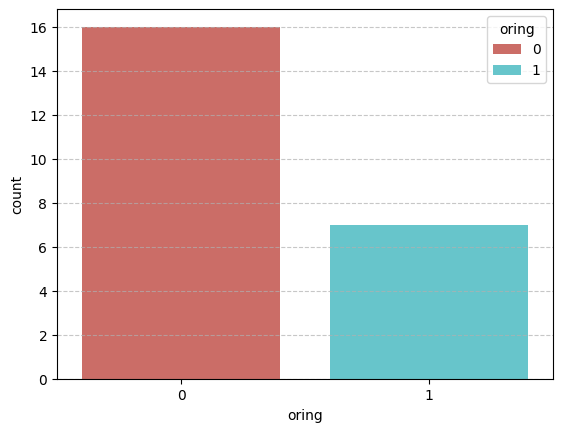

In [25]:
# Create a countplot using seaborn
sns.countplot(
    data = df_challenger,  # Specify the dataframe
    x='oring',             # Set 'oring' as the variable
    hue='oring',           # Set 'oring' again as the hue
    palette='hls'          # Use the 'hls' color palette
)

plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a horizontal grid
plt.show()                                     # Display the plot

In [26]:
y = df_challenger['oring']    # Assign the 'oring' column as the dependent variable
X = df_challenger['temp']     # Assign the 'temp' column as the independent variable

X_const = sm.add_constant(X)  # Add a constant term to the independent variable for the intercept

model = sm.Logit(y, X_const)  # Create a logistic regression model using 'y' and 'X_const'

results = model.fit()         # Fit the logistic regression model to the data

Optimization terminated successfully.
         Current function value: 0.441635
         Iterations 7


In [27]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  oring   No. Observations:                   23
Model:                          Logit   Df Residuals:                       21
Method:                           MLE   Df Model:                            1
Date:                Wed, 15 Jan 2025   Pseudo R-squ.:                  0.2813
Time:                        15:52:06   Log-Likelihood:                -10.158
converged:                       True   LL-Null:                       -14.134
Covariance Type:            nonrobust   LLR p-value:                  0.004804
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.0429      7.379      2.039      0.041       0.581      29.505
temp          -0.2322      0.108     -2.145      0.032      -0.444      -0.020
==============================================================================
"""

In [28]:
coef_const = results.params['const']  # Extract the constant coefficient
coef_const

15.042901647702445

In [29]:
coef_temp = results.params['temp']  # Extract the coefficient for the 'temp' variable
coef_temp

-0.23216274421859653

    predicted logit = 15.0429 - 0.2322(temp)

In [31]:
x = 53    # Temperature

predicted_logit1 = 15.0429 - 0.2322 * x

predicted_logit1

2.7363

In [32]:
df_challenger['prediction'] = coef_const + coef_temp * df_challenger['temp']

df_challenger.head()

,oring,temp,prediction
0,1,53,2.738276
1,1,57,1.809625
2,1,58,1.577462
3,1,63,0.416649
4,0,66,-0.279839


In [33]:
df_challenger.iloc[1,2]

1.8096252272424422

In [34]:
df_challenger.tail()

,oring,temp,prediction
18,0,76,-2.601467
19,0,76,-2.601467
20,0,78,-3.065792
21,0,79,-3.297955
22,0,81,-3.762281


In [35]:
predicted_logit = df_challenger['prediction']
X = df_challenger['temp']

stats.spearmanr(predicted_logit, X)

SignificanceResult(statistic=-1.0, pvalue=0.0)

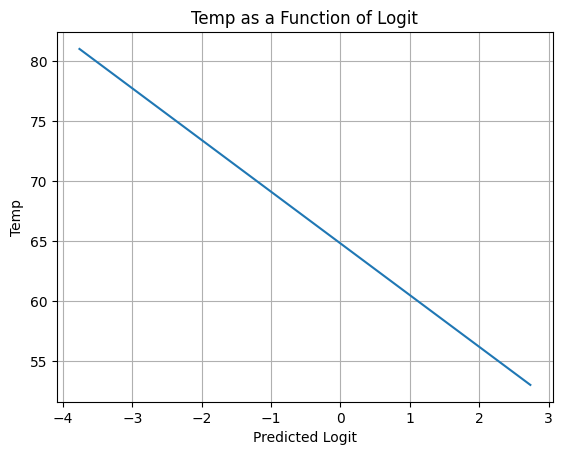

In [36]:
plt.plot(predicted_logit, X)              # Create a Plot prediction by temperature

plt.xlabel('Predicted Logit')             # Label for the x-axis
plt.ylabel('Temp')                        # Label for the y-axis
plt.title('Temp as a Function of Logit')  # Title of the plot
plt.grid(True)                            # Add grid
plt.show()                                # Display the plot

## Multiple Logistic Regression

In [38]:
url = ('https://raw.githubusercontent.com/juroland/datascience/557808f36f2b1362e8a53af70e2ca85ac40c0368/datasets/Smarket.csv')

df = pd.read_csv(url)

df.head()

,Unnamed: 0,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [39]:
# Drop the first column (index 0) from the DataFrame
df = df.drop(df.columns[0], axis=1)  

df.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


    Direction = Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume

In [41]:
import statsmodels.formula.api as smf

change = np.where(df['Direction']=='Up', 1, 0)       # Create a binary variable where 'Up' is 1 and other values are 0

model_constant = sm.add_constant(df[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']])  # Add a constant term to the features for intercept

model = sm.GLM(change,                               # Specify the dependent variable (change)
               model_constant,                       # Specify the independent variables (with constant added)
               family=sm.families.Binomial()).fit()  # Fit a Generalized Linear Model (GLM) with a Binomial family (logistic regression)

model.summary()                                      # Display the summary of the fitted model

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 1250
Model:                            GLM   Df Residuals:                     1243
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -863.79
Date:                Wed, 15 Jan 2025   Deviance:                       1727.6
Time:                        15:52:07   Pearson chi2:                 1.25e+03
No. Iterations:                     4   Pseudo R-squ. (CS):           0.002868
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1260      0.241     -0.523      0.601      -0.598       0.346
Lag1          -0.0731      0.050     -1.457      0.145      -0.171       0.025
Lag2          -0.0423      0.050     -0.845      0.398      -0.140       0.056
Lag3           0.0111      0.050      0.222      0.824      -0.087       0.109
Lag4           0.0094      0.050      0.187      0.851      -0.089       0.107
Lag5           0.0103      0.050      0.208      0.835      -0.087       0.107
Volume         0.1354      0.158      0.855      0.392      -0.175       0.446
==============================================================================
"""

To get the odds for each predictor, recall that we are to exponentiate the logit. 

In [43]:
# The odds for Lag1 holding all other variables in the model constant
np.exp(-0.0731)

0.9295078745906393

Since an odds of 1.0 represents even odds, the number 0.9295 represents a decrease. That is, for a one-unit increase in Lag1, the likelihood of the event decreases (i.e. it is below a probability of 0.50 for our data). This is challenging to make sense of in terms of odds. Probabilities here will be much more intuitive. Fortunately, we can also convert this odds to a probability. We do this by dividing the odds by 1 + odds:

In [45]:
# The probability of being in the group labeled 1
prob = np.exp(-0.0731)/(1 + np.exp(-0.0731))
prob

0.4817331335265174

The probability is 0.4817 of being in the group labeled 1.

### A Model with Only Lag1

In [48]:
model_constant = sm.add_constant(df[['Lag1']])

model = sm.GLM(change, model_constant, family=sm.families.Binomial()).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 1250
Model:                            GLM   Df Residuals:                     1248
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -864.60
Date:                Wed, 15 Jan 2025   Deviance:                       1729.2
Time:                        15:52:07   Pearson chi2:                 1.25e+03
No. Iterations:                     4   Pseudo R-squ. (CS):           0.001581
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0740      0.057      1.306      0.191      -0.037       0.185
Lag1          -0.0702      0.050     -1.404      0.160      -0.168       0.028
==============================================================================
"""

Note that the coefficient for Lag1 has changed from its original value, from an estimate of –0.0731 in the original model to –0.0702 when used as the only predictor. The
change in this case is slight, but the point is that these coefficients do habitually
change. 

In [50]:
print(model.params)

const    0.074011
Lag1    -0.070231
dtype: float64


In [51]:
print(model.pvalues)

const    0.191418
Lag1     0.160424
dtype: float64
